In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

1000


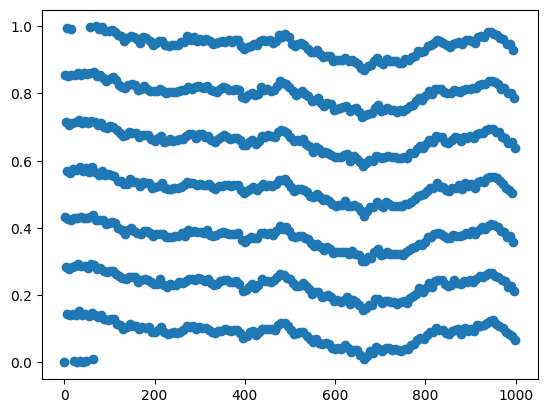

In [2]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1] + np.sin(2*np.pi*traj[-1]/2*np.pi)) % 1
    return traj

x = 0
v = 3/7
omega = 10
n = 1000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
print(len(traj))
plt.scatter(np.arange(n), traj)

In [3]:
traj[0]

0.0

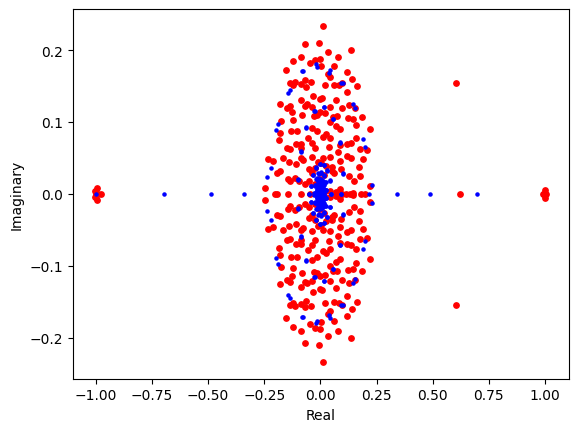

In [33]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1] + np.sin(2*np.pi*traj[-1]/2*np.pi)) % 1
    return traj

# def get_obsvervation_noisy_rotation(n1, traj):
#     f = np.zeros((2*n1, len(traj)))
#     for i in range(n1):
#         f[i,:] = np.cos(2*i*np.pi*traj)
#         f[i+n1,:] = np.sin(2*i*np.pi*traj)
#     return f

###

from numpy.polynomial import Laguerre
def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((n1, len(traj)))
    for i in range(n1):
        p = Laguerre([0]*i + [1])
        f[i,:] = p(traj)
    return f

###

def get_obsvervation_noisy_rotation_expectation(x_init=0, m=5000, v=np.pi/320, delta=0.01, n1=150, mean_no=100):
    fs = np.zeros((mean_no, 2*n1, m))
    for i in range(mean_no):
        # print(i)
        traj = noisy_rotation(x_init, v, None, m, delta)
        # print(fs[i].shape)
        # print(get_obsvervation_noisy_rotation(n1, traj).shape)
        fs[i] = get_obsvervation_noisy_rotation(n1, traj)
    return np.mean(fs, axis=0), fs

x = 0
v = 1/2
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 300
# f, fs = get_obsvervation_noisy_rotation_expectation()
f = get_obsvervation_noisy_rotation(n1, traj)
# print('finish gen')
#DMD
X = f[:,:-1]
Y = f[:,1:]
# print(f.shape)
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

circle = np.exp(0+1j * np.linspace(0, 2*np.pi, 80))
# extract real part
cre = [ele.real for ele in circle]
# extract imaginary part
cim = [ele.imag for ele in circle]

# plot the complex numbers
plt.scatter(re[:], im[:], s=15, c='red')
plt.scatter(trueevalues[0], trueevalues[1], s=5, c='blue')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()


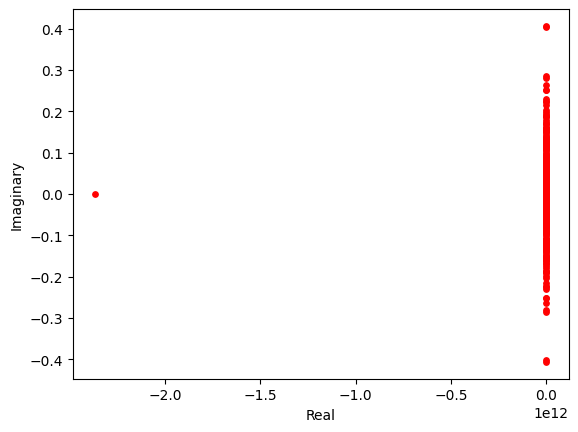

In [5]:
# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [6]:
from scipy.special import jv

# Generate the value of the Bessel function J_2(3)
result = jv(3, 2.5)

print(result)  # Output: -0.2600519549019335


0.21660039103911358


[[ 5.55490284e-19+7.21904577e-19j -6.44690653e-06+5.92679094e-06j
  -3.83147771e-05-3.49756838e-05j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.67164033e-18+2.17243189e-18j  2.51956930e-05-2.31629859e-05j
   3.55932049e-05+3.24912938e-05j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-5.51311183e-19-7.16473497e-19j  6.44690653e-06-5.92679094e-06j
   3.82255710e-05+3.48942520e-05j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  3.82255710e-05-3.48942520e-05j
   6.44690653e-06+5.92679094e-06j -5.51311183e-19+7.16473497e-19j]
 [-0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j ...  3.55932049e-05-3.24912938e-05j
   2.51956930e-05+2.31629859e-05j  1.67164033e-

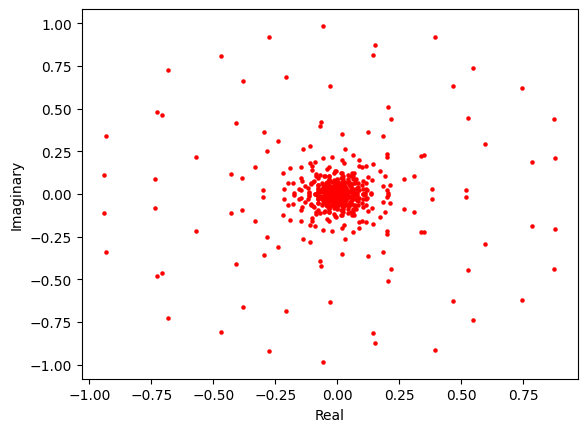

In [6]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def get_n(i,k,N):
    if k < N:
        return k-N
    return k-N+1

def get_j(i,k,N):
    if i < N:
        return i-N
    return i-N+1

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N, 2*N),dtype='complex')
    for i in range(2*N):
        for k in range(2*N):
            n = get_n(i,k,N)
            j = get_j(i,k,N)
            # print(n,j)
            # print(jv(n-j, n*K))
            # if n==j:
            #     print('t')
            A[i,k] = cmath.sin(cmath.pi*delta*n)/(delta*cmath.pi*n)*cmath.exp(2*cmath.pi*(0+1j)*n*v)*jv(n-j, n*K)
    print(A)
    w, v = np.linalg.eig(A)
    return w, v, A

delta = 0.01
N = 800
K = 1
v = np.sqrt(5)-2
w, v, A = eval_approx(N, K, delta, v)
print(w)
# w = np.diag(A)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]
trueevalues = [re, im]

# plot the complex numbers
plt.scatter(re, im, s=5, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

[[-1.88034801e-018-3.50187734e-018j -3.01019185e-005-6.25802005e-005j
   1.50750868e-005+3.52703635e-005j ... -2.78192202e-162+6.50871217e-162j
   2.32285335e-162-4.82908187e-162j  1.56904012e-175-2.92211124e-175j]
 [-4.46634851e-019-8.31793084e-019j -3.12098267e-005-6.48834797e-005j
   7.74258863e-005+1.81149150e-004j ... -1.04135441e-161+2.43640047e-161j
   8.68251440e-162-1.80504606e-161j  5.85638987e-175-1.09066827e-174j]
 [ 1.87811483e-018+3.49771838e-018j  3.01019185e-005+6.25802005e-005j
  -1.54641616e-005-3.61806607e-005j ... -3.89245836e-161+9.10697387e-161j
   3.24072042e-161-6.73727604e-161j  2.18272374e-174-4.06500860e-174j]
 ...
 [ 2.18272374e-174+4.06500860e-174j  3.24072042e-161+6.73727604e-161j
  -3.89245836e-161-9.10697387e-161j ... -1.54641616e-005+3.61806607e-005j
   3.01019185e-005-6.25802005e-005j  1.87811483e-018-3.49771838e-018j]
 [ 5.85638987e-175+1.09066827e-174j  8.68251440e-162+1.80504606e-161j
  -1.04135441e-161-2.43640047e-161j ...  7.74258863e-005-1.811491

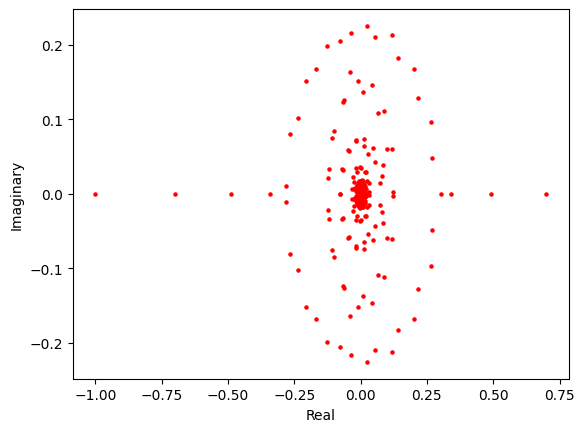

In [16]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def get_n(i,k,N):
    if k < N:
        return k-N
    return k-N+1

def get_j(i,k,N):
    if i < N:
        return i-N
    return i-N+1

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N, 2*N),dtype='complex')
    for i in range(2*N):
        for k in range(2*N):
            n = get_n(i,k,N)
            j = get_j(i,k,N)
            # print(n,j)
            # print(jv(n-j, n*K))
            # if n==j:
            #     print('t')
            A[i,k] = cmath.sin(cmath.pi*delta*n)/(delta*cmath.pi*n)*cmath.exp(2*cmath.pi*(0+1j)*n*v)*jv(n-j, n*K)
    print(A)
    w, v = np.linalg.eig(A)
    return w, v, A

delta = 0.01
N = 400
K = 1
v = 1/2+np.sqrt(2)/200
w, v, A = eval_approx(N, K, delta, v)
print(w)
# w = np.diag(A)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
plt.scatter(re, im, s=5, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

[[ 9.17921471e-17+4.53332315e-17j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j ... -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-0.00000000e+00+0.00000000e+00j -2.17411044e-03-1.24601171e-03j
   0.00000000e+00-0.00000000e+00j ... -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -4.19477537e-03-2.76089379e-03j ... -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00-0.00000000e+00j ... -4.19477537e-03+2.76089379e-03j
  -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00-0.00000000e+00j
  -2.17411044e-03+1.24601171e-03j  0.00000000e+

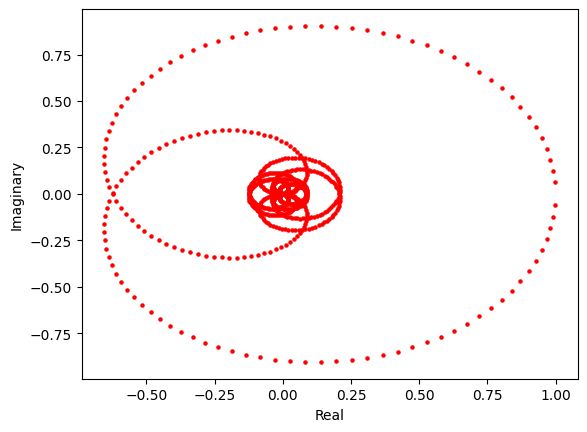

In [9]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def get_n(i,k,N):
    if k < N:
        return k-N
    return k-N+1

def get_j(i,k,N):
    if i < N:
        return i-N
    return i-N+1

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N, 2*N),dtype='complex')
    for i in range(2*N):
        for k in range(2*N):
            n = get_n(i,k,N)
            j = get_j(i,k,N)
            # print(n,j)
            # print(jv(n-j, n*K))
            # if n==j:
            #     print('t')
            A[i,k] = cmath.sin(cmath.pi*delta*n)/(delta*cmath.pi*n)*cmath.exp(2*cmath.pi*(0+1j)*n*v)*jv(n-j, n*K)
    print(A)
    w, v = np.linalg.eig(A)
    return w, v, A

delta = 0.01
N = 400
K = 0
v = pi/320
w, v, A = eval_approx(N, K, delta, v)
print(w)
# w = np.diag(A)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
plt.scatter(re, im, s=5, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()